# Data manipulation cheatsheet
## Introduction

this is the companion colab code for my tutorial in medium about Data manipulation cheatsheet in Python, please read the article for better understanding of the code. In the article I discuss about the theory behinds, trick, use cases and so on. Here I am providing just generic information about the algorithms and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about Data manipulation cheatsheet](https://)

note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)

## Observations and features

we use the titanic dataset, let explore the this dataset and do the first data manipulation

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')

In [ ]:
#finding categorial and numerical variables
numerical = df.applymap(np.isreal).all()
#numerical is true, categorical is false
#or more elegant
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#summary statistics for the numerical colums
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#obtaining the count for a categorical variable
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Dataset charachteristics and issues

we will use pandas functions and more to find the charachteristics of our dataset (dimensionality, distribution, resolution). 

Moreover, we will check the presence of different issues and how to solve them (like missing values, duplicate data, inconsistent data)

In [ ]:
#find list column with missing values
na_col = df.columns[df.isnull().any()].tolist()
na_col

['Age', 'Cabin', 'Embarked']

In [ ]:
#selecting the rows with missing values
na_row = df[df.isnull().any(axis = 1)]
na_row = na_row.index.to_list() #getting a list
df.isnull().any(axis = 1).sum() #number of na row present

708

In [ ]:
#any remove a row/col if has any missing value, all instead if there are all missing values
df_noNa_row = df.dropna(axis = 0, how = "any") #remove rows with na
df_noNa_col = df.dropna(axis = 1, how = "any") #remove col with na
df.shape, df_noNa_row.shape, df_noNa_col.shape

((891, 12), (183, 12), (891, 9))

In [ ]:
#remove rows with NA only in a subset of column
df1=df.dropna(subset=['Age'])
df2 = df.dropna(subset=['Cabin', 'Age'])
df1.shape, df2.shape

((714, 12), (185, 12))

In [ ]:
age_fill = df[["Age"]].fillna(0) #careful, it return a df of the column Age
df1 = df.fillna(method ='pad') #substitute the NA with the previous value
df1 = df.fillna(method ='bfill') #substitute the NA with the next value
df1 = df.fillna(0) #this is substitute zero in each columns
df.Age, df1.Age

(0      22.0
 1      38.0
 2      26.0
 3      35.0
 4      35.0
        ... 
 886    27.0
 887    19.0
 888     NaN
 889    26.0
 890    32.0
 Name: Age, Length: 891, dtype: float64, 0      22.0
 1      38.0
 2      26.0
 3      35.0
 4      35.0
        ... 
 886    27.0
 887    19.0
 888     0.0
 889    26.0
 890    32.0
 Name: Age, Length: 891, dtype: float64)

In [ ]:
age_inter = df[["Age"]].interpolate(method ='linear', limit_direction ='forward')
df1 = df.loc[:, ["Age"]]
df1["interpolated"] = age_inter.Age
df1

,Age,interpolated
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,22.5
889,26.0,26.0


## Data pre-processing

some common pre-processing techniques like aggregation, sampling (different type of sampling as simple, stratified), dimensionality reduction, discretization (binarization, equal width, equal frequency, k-means binarization). These all functions can be handy in many contexts.

I will also discuss about variable transformation, techniques as standardization and so on

In [ ]:
#you can use this method to remove extreme and inconsistent values
df1 = df[(df['Age'] > 1) & (df['Age'] < 80)]
df2 = df[(df["Sex"] == "female")]
adult = df['Age'] > 18 #return a boolean list
df3 = df[adult] 
df.shape, df1.shape, df2.shape, df3.shape

((891, 12), (699, 12), (314, 12), (575, 12))

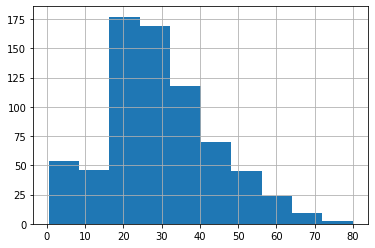

In [ ]:
#To investigate distribution
df["Age"].hist()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#selecting and grouping
df1 = df[["Age", "Fare", "Sex"]].groupby(["Sex"]).mean()
df1

,Age,Fare
Sex,,
female,27.915709,44.479818
male,30.726645,25.523893


In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#aggregate in high category
replacement = { "Embarked" : {"S" :  "England", "C" : "France", "Q" : "England"}}
df1 = df.replace(replacement)
df1["Embarked"].value_counts()

England    721
France     168
Name: Embarked, dtype: int64

In [ ]:
#simple sampling
df1 = df.sample(frac = 0.3) #without replacement
df1 = df.sample(frac = 0.3, replace= True) #without replacement
df1.shape

(267, 12)

In [ ]:
#stratified sampling
from sklearn.model_selection import train_test_split
df_strat, _ = train_test_split(df, test_size=0.7, stratify=df[ 'Sex'])
df["Embarked"] = df.Embarked.fillna("Q") #otherwise give error with Na
df_strat, _ = train_test_split(df, test_size=0.7, stratify=df[[ 'Sex', "Embarked"]])
df_strat.shape

(267, 12)

In [ ]:
#dimentionality reduction with PCA
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = PCA(n_components=4) #select number components
pca.fit(X)
#notice only the first component show higher variance
pca.explained_variance_ratio_ 

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
#dimensionality reduction with single value decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(X)
svd.explained_variance_ratio_

array([0.52875361, 0.44845576, 0.01757678])

In [ ]:
#drop irrelevant feature
df1 = df.drop("PassengerId", 1)
df1 = df.drop(["PassengerId", "Name"], 1)
df.shape, df1.shape

((891, 12), (891, 10))

In [ ]:
#calculate correlation
df['Age'].corr(df['Fare'])

0.0960666917690389

In [ ]:
#create a new feature
df1 = df.loc[:, ["Age", "Fare"]]
df1["Ratio"] = df1["Fare"] / df1["Age"]

In [ ]:
#binarization
pd.get_dummies(y)
df1 = df.loc[:, ["Age", "Fare", "Sex"]]
df1 = pd.get_dummies(df1, columns = ["Sex"])
df1

,Age,Fare,Sex_female,Sex_male
0,22.0,7.2500,0,1
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,1
...,...,...,...,...
886,27.0,13.0000,0,1
887,19.0,30.0000,1,0
888,NaN,23.4500,1,0
889,26.0,30.0000,0,1


In [ ]:
#equal width discretization
df1 = df.loc[:, ["Survived", "Age"]]
df1["age_bin"] = pd.cut(df1["Age"],5)
df1["age_bin"].value_counts()

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: age_bin, dtype: int64

In [ ]:
#equal frequency discretization
df1 = df.loc[:, ["Survived", "Age"]]
df1["age_bin"] = pd.qcut(df1["Age"],5)
df1["age_bin"].value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: age_bin, dtype: int64

In [ ]:
#equal frequency discretization with labels
bin_label = ["young", "middle_age", "old"]
df1["age_bin"] = pd.qcut(df1["Age"], 3, labels = bin_label)
df1["age_bin"].value_counts()

young         246
old           236
middle_age    232
Name: age_bin, dtype: int64

In [ ]:
#k-means binarization, notice scikit learn want a 2d array
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
X = df.loc[:, ["Age", "Fare"]]
X["Age"] = X[["Age"]].interpolate(method ='linear', limit_direction ='forward')
discretizer.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:184: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[1., 0.],
       [2., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [2., 0.]])

In [ ]:
#alternative method
#!pip3 install feature_engine 
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
df1 = df.loc[:, ["Survived", "Age"]]
discretizer = EqualWidthDiscretiser(bins=3, variables = ["Age"])
discretizer = EqualFrequencyDiscretiser(q=3, variables = ["Age"])
df1["Age"] = df1[["Age"]].interpolate(method ='linear', limit_direction ='forward')
discr = discretizer.fit_transform(df1)
discr.Age.value_counts()

1    447
0    390
2     54
Name: Age, dtype: int64

In [ ]:
#standardization
from scipy.stats import zscore
df1 = df.loc[:, ["Survived", "Age"]]
df1["Age"] = zscore(df1["Age"], nan_policy = "omit") #otherwise all NaN
df1["Age"] 

0     -0.530377
1      0.571831
2     -0.254825
3      0.365167
4      0.365167
         ...   
886   -0.185937
887   -0.737041
888         NaN
889   -0.254825
890    0.158503
Name: Age, Length: 891, dtype: float64

In [ ]:
#scaling
df1 = df.loc[:, ["Survived", "Age"]]
df1["Age"]  = (df1.Age - df1.Age.min())/(df1.Age.max()-df1.Age.min())
df1["Age"] 

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64